<a href="https://colab.research.google.com/github/zixiumeng/JSC270_Lab3/blob/solution/%E2%80%9CJSC270_Lab3_solutions_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 3: Linear Regression in Python

***
Linear regression is used to model and predict continuous outcomes. 

In this lab, we will cover the basics of fitting a linear regression in python.  We will also go through some more EDA so you get more practice and are prepared for homework 2.

The packages we'll cover are: `statsmodels`, `seaborn`, and `scikit-learn`.
***

In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import statsmodels.api as sm
import statsmodels.formula.api as smf 

import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster") #a small change

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


***
### Quick recap from lecture
***
<div class="span5 alert alert-info">

<p> Suppose you have data on $p$ covariates, $X = (X_1, \dots, X_p)^T$, and a continuous outcome, $Y$.  The linear regression model is written as  


$$ Y = \beta_0 + \beta_1 X_1 + \ldots + \beta_p X_p + \epsilon$$ 

where $\epsilon$ is an error term.  We typically assume that $E(\epsilon |X) = 0$ so that 

$$ E(Y|X) = \beta_0 + \beta_1 X_1 + \ldots + \beta_p X_p.$$ 

Linear regression is used to: </p>
<ul>
  <li> Build a <b>predictive model</b> to predict the value of the outcome for a new observation using data on the covariates.  It is often the first pass prediction algorithm for continuous outcomes.  </li>
  <li> Model the <b>strength of the relationship</b> between $X$ and $Y$.  It is the most common model for statisticians interested in understanding the relationship between a set of covariates and a continuous outcome $Y$. </li>
    <ul>

The parameters (or coefficients) of the model, $\beta = (\beta_1, \dots, \beta_p)^T$, are commonly estimated with **least squares**.  The least squares estimate, $\hat{\beta}$, is the $\beta$ that minimizes the residual sum of squares.

</div>

***
# Linear Regression Example: California Housing Data Set

The dataset can loaded directly from `sklearn`.
***

In [ ]:
from sklearn.datasets import fetch_california_housing
california_housing = fetch_california_housing(as_frame = True) # Imports data as a pandas dataframe

In [ ]:
print(california_housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [ ]:
# What all does california housing contain?
california_housing.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

## Take a look at each element in the dictionary.  What does each element contain?

In [ ]:
# Size of the data set
california_housing.frame.shape

(20640, 9)

In [ ]:
# Print names of the covariates
print(california_housing.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [ ]:
# Print name of the outcome
print(california_housing.target_names)

['MedHouseVal']


## EDA and Summary Statistics
***

Let's explore this dataset!

In [ ]:
# Create variable for the data
cali = california_housing.frame

In [ ]:
cali.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
cali.tail()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847
20639,2.3886,16.0,5.254717,1.162264,1387.0,2.616981,39.37,-121.24,0.894


In [ ]:
# Check variable types and if there is missing data
cali.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [ ]:
# Basic descriptive stats
cali.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


## Can you give a brief description of the dataset?

### Histograms

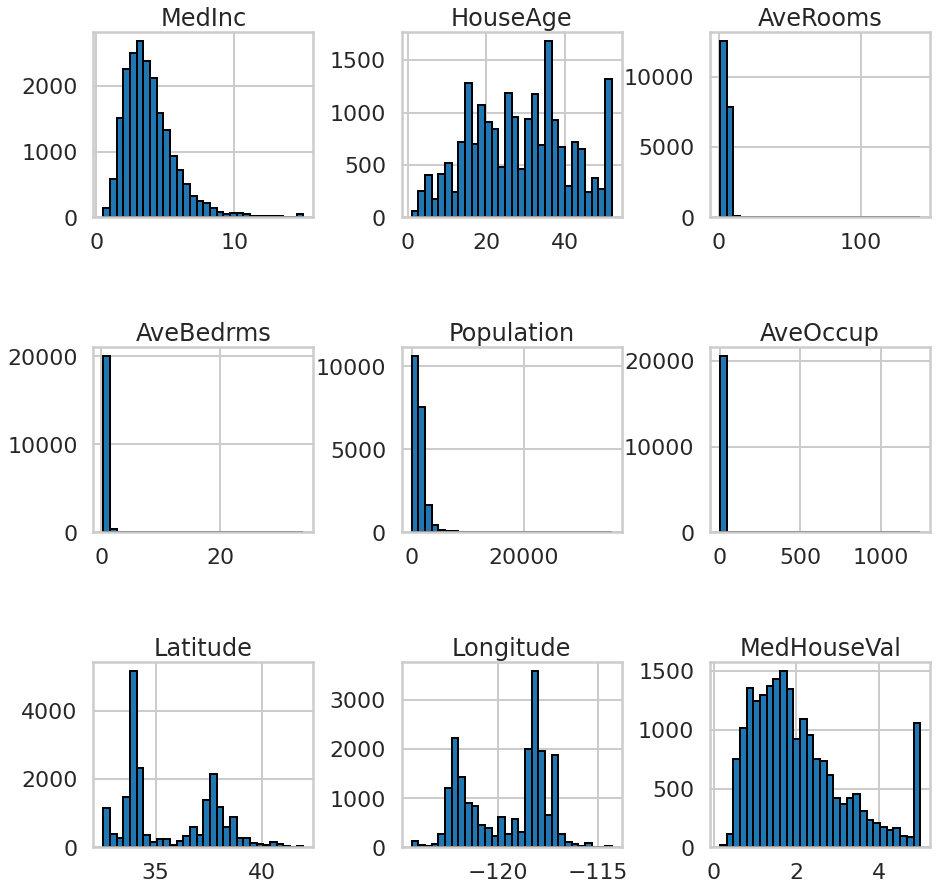

In [ ]:
# Make histograms for the variables
cali.hist(figsize=(15, 15), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

### What do you notice from the histograms?

### Scatterplots and More!
***


In [ ]:
# Take a closer look at  average rooms, average bedrooms, average occupation, and population
# Check to see if what we gather from plot is consistent with the summary stats - how do the 75% quantile and max compare?
features_to_check = ["AveRooms", "AveBedrms", "AveOccup", "Population"]
california_housing.frame[features_to_check].describe()

,AveRooms,AveBedrms,AveOccup,Population
count,20640.000000,20640.000000,20640.000000,20640.000000
mean,5.429000,1.096675,3.070655,1425.476744
std,2.474173,0.473911,10.386050,1132.462122
min,0.846154,0.333333,0.692308,3.000000
25%,4.440716,1.006079,2.429741,787.000000
50%,5.229129,1.048780,2.818116,1166.000000
75%,6.052381,1.099526,3.282261,1725.000000
max,141.909091,34.066667,1243.333333,35682.000000


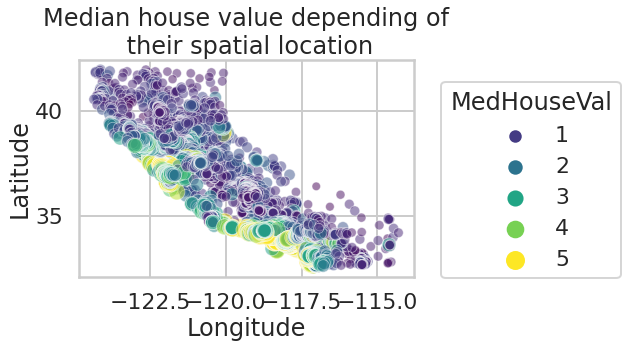

In [ ]:
# Take a closer look at lat + lon
sns.scatterplot(data=cali, x="Longitude", y="Latitude",
                size="MedHouseVal", hue="MedHouseVal",
                palette="viridis", alpha=0.5)
plt.legend(title="MedHouseVal", bbox_to_anchor=(1.05, 0.95),
           loc="upper left")
_ = plt.title("Median house value depending of\n their spatial location")

Note that the plot is shaped like California as we would expect.  We can also see high prices homes are along the coast, likeley where the big cities are such as San Diego, Los Angeles, San Francisco, and San Jose.

In [ ]:
# Make paired scatterplots for everything except latitude and longitude
columns_drop = ["Longitude", "Latitude"]

# The plot we are going to run is resouce heavy so lets take a subset of the dataset for now (it takes a few minutes for all the data)
rng = np.random.RandomState(0)
indices = rng.choice(np.arange(california_housing.frame.shape[0]), size=100,
                     replace=False)

cali_subset = cali.iloc[indices].drop(columns=columns_drop)

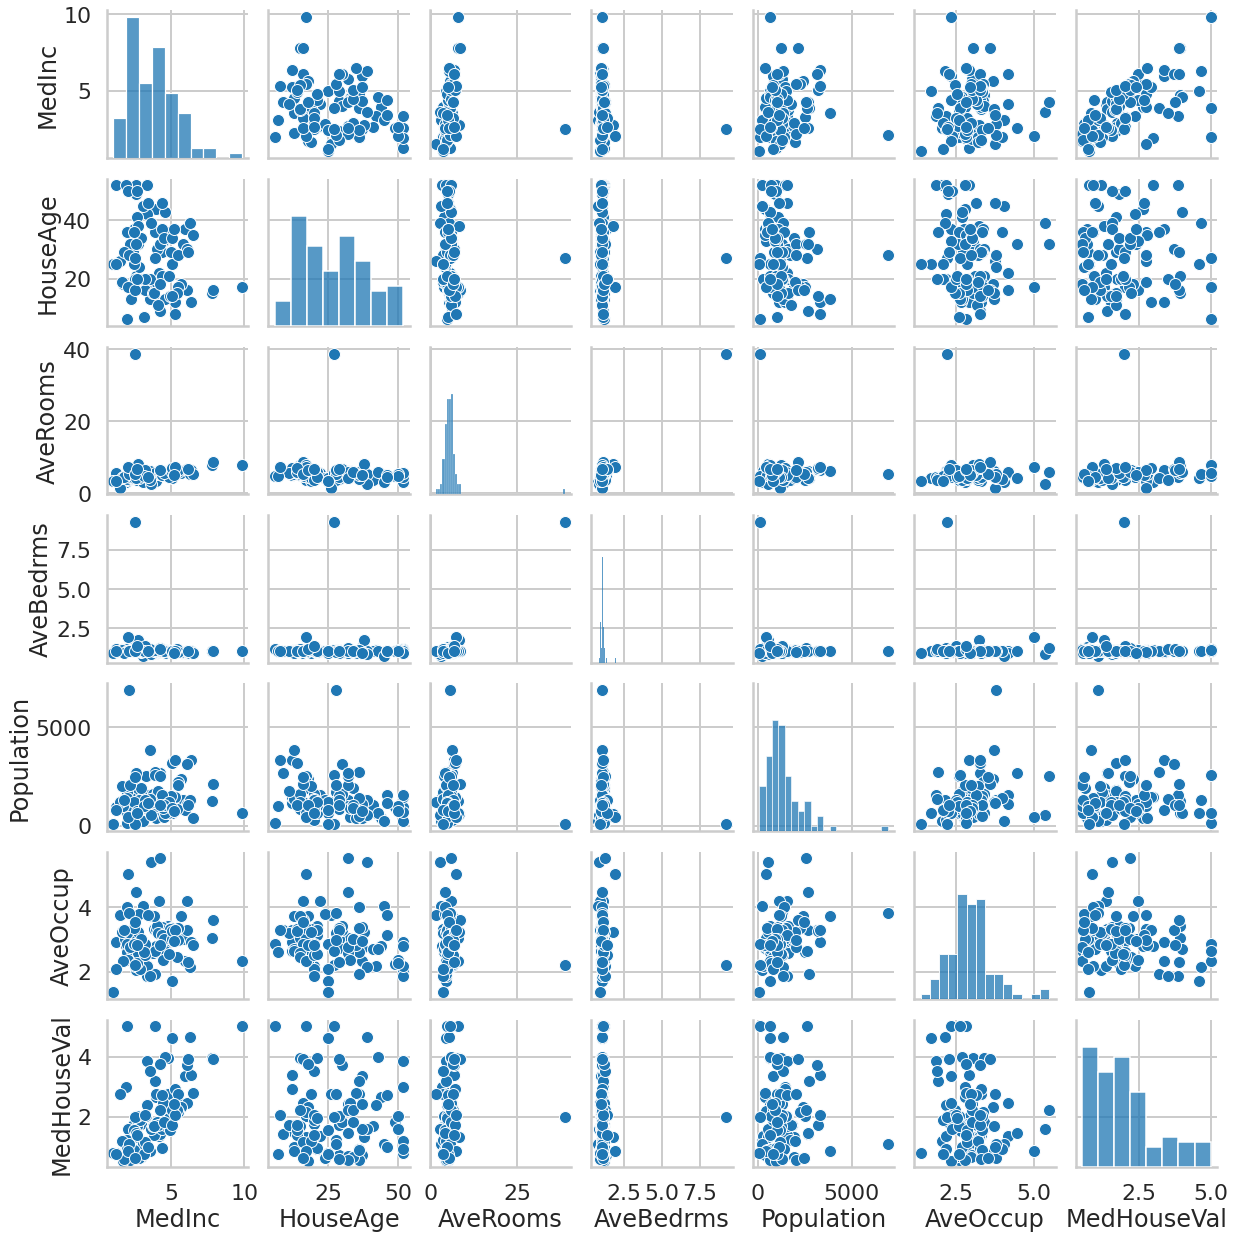

In [ ]:
_ = sns.pairplot(data=cali_subset)

### What do you notice in the plot?

In [ ]:
# We can also calculate pairwise correaltions
corrMat = cali.corr()
corrMat

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
MedHouseVal,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


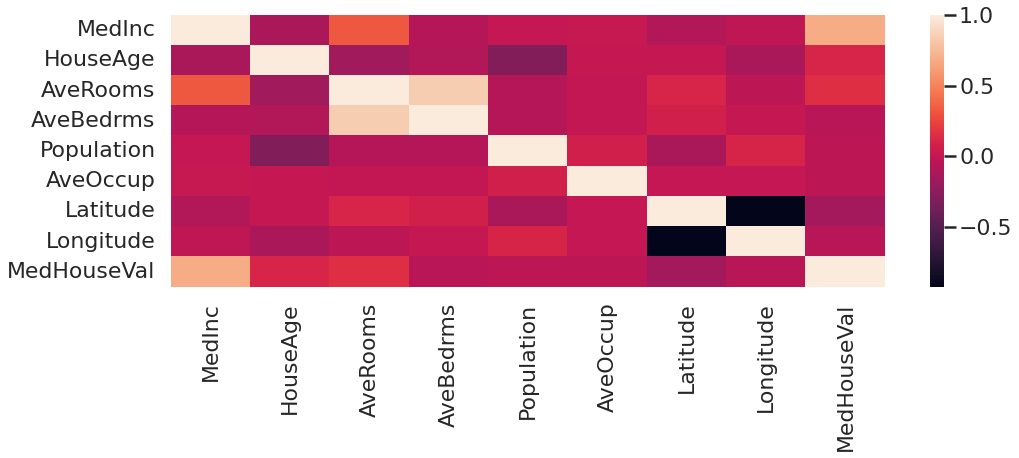

In [ ]:
# You can plot correlations in a heatmap
plt.figure(figsize = (16,5))
sns.heatmap(corrMat, annot=False)
plt.show()

In [ ]:
# Pearson correlation test
stat, p = stats.pearsonr(cali['MedInc'], cali['MedHouseVal'])
print('stat=%.3f, p=%.3f' % (stat, p))

stat=0.688, p=0.000


# Fitting linear regression models

In [ ]:
# Let's fit a simple model with just the median income as a covariate
reg1 = smf.ols('MedHouseVal ~ MedInc', data = cali).fit()
print(reg1.summary())

                            OLS Regression Results                            
Dep. Variable:            MedHouseVal   R-squared:                       0.473
Model:                            OLS   Adj. R-squared:                  0.473
Method:                 Least Squares   F-statistic:                 1.856e+04
Date:                Sun, 30 Jan 2022   Prob (F-statistic):               0.00
Time:                        18:32:31   Log-Likelihood:                -25623.
No. Observations:               20640   AIC:                         5.125e+04
Df Residuals:                   20638   BIC:                         5.127e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4509      0.013     34.082      0.0

### How do you interpret the coefficients in the model?

### What can you conclude from the results? What is the confidence interval for the slope parameter?

### Do you think your model can give predictions higher than 5?

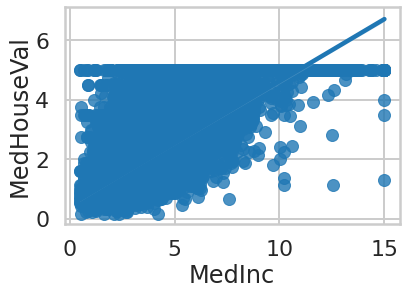

In [ ]:
# Plot the fit of our model - recall that the max med housing value is 5
sns.regplot(y='MedHouseVal', x='MedInc', data=cali)
plt.show()

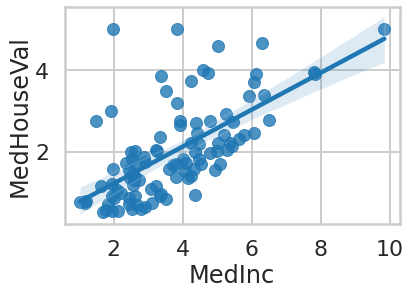

In [ ]:
# Lets again use the subset of data to make the plot 
sns.regplot(y ='MedHouseVal', x ='MedInc', data=cali_subset)
plt.show()

In [ ]:
# Sometimes we transform variables that are highly skewed, lets try this with median income and median house value
cali['log_MedHouseVal'] = np.log(cali.MedHouseVal)
cali['log_MedInc'] = np.log(cali.MedInc)
reg1_log = smf.ols('log_MedHouseVal ~ log_MedInc', data = cali).fit()
print(reg1_log.summary())

                            OLS Regression Results                            
Dep. Variable:        log_MedHouseVal   R-squared:                       0.454
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                 1.714e+04
Date:                Sun, 30 Jan 2022   Prob (F-statistic):               0.00
Time:                        18:32:33   Log-Likelihood:                -11413.
No. Observations:               20640   AIC:                         2.283e+04
Df Residuals:                   20638   BIC:                         2.285e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.4417      0.008    -53.359      0.0

## Do your results change?  Does your interpretation change?

In [ ]:
# Now let's fit a model adding in house age
reg2 = smf.ols('MedHouseVal ~ MedInc + HouseAge', data = cali).fit()
print(reg2.summary())

                            OLS Regression Results                            
Dep. Variable:            MedHouseVal   R-squared:                       0.509
Model:                            OLS   Adj. R-squared:                  0.509
Method:                 Least Squares   F-statistic:                 1.070e+04
Date:                Sun, 30 Jan 2022   Prob (F-statistic):               0.00
Time:                        18:32:33   Log-Likelihood:                -24899.
No. Observations:               20640   AIC:                         4.980e+04
Df Residuals:                   20637   BIC:                         4.983e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1019      0.019     -5.320      0.0

### How do you interpret the coefficients?  What do the results of the hypothesis test indicate?

### How does your model compare to the model with only median income?

## Looking ahead

We will come back to regression later in the course and learn how to make predictions, build models with a large number of covariates, and evaluate model performance!